# Credit Card Fraud Detection with Python - Em Construção ...


## Contexto e objetivo

Neste conjunto de dados, mergulhamos nas transações de cartão de crédito na Europa durante setembro de 2013. Ao longo de dois dias, foram registradas 284.807 transações, sendo apenas 492 delas consideradas fraudulentas (0,172%). As variáveis são todas numéricas, resultado de uma transformação PCA (que além de reduzir a dimensionalidade dos dados, codificou os dados sensiveis para não expor as transações realizadas durante o periodo), com exceção de 'Time' (tempo) e 'Amount' (valor).

O principal propósito deste estudo é a criação de um modelo preditivo capaz de antecipar e identificar transações fraudulentas, utilizando o aprendizado adquirido por meio do dataset fornecido. A antecipação eficaz de fraudes é de extrema importância para as operadoras de cartões de crédito, visando a proteção dos clientes e a manutenção da integridade financeira. Ao desenvolver esse modelo,  buscamos fortalecer a capacidade de identificar comportamentos não autênticos, permitindo uma detecção precoce de atividades suspeitas e, assim, mitigando potenciais prejuízos.

---


Mais informações sobre o dataset pode ser encontrada atráves do kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [51]:
caminho = r'C:\Users\Lucas\Downloads\creditcard\creditcard.csv'

In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
%%matplotlib inline

# Desativar todos os warnings
warnings.filterwarnings("ignore")

UsageError: Line magic function `%%matplotlib` not found.


In [53]:
df = pd.read_csv(caminho)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
df[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [56]:
 df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Não há nenhum valor nulo no dataset

In [57]:
# Verificando a quantidade de fraudes no dataset
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: ylabel='count'>

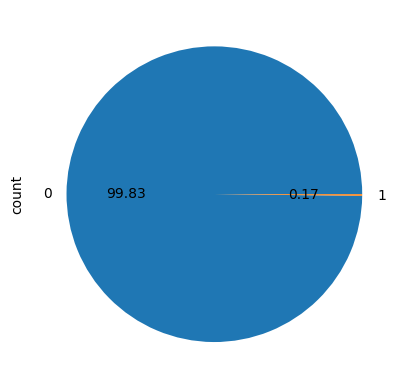

In [58]:
# Verificando visualmente a quantidade de fraudes no dataset
df.Class.value_counts().plot.pie(autopct='%.2f')

### Criando um modelo ML para identificar fraude

- Criando um modelo que identifique as fraudes antes de fazer qualquer alteração em nosso dataframe. Essa previsão servirá como guia para identificarmos se estamos indo na direção certa ou errada

In [59]:
X = df.drop('Class', axis=1)
y = df['Class']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [61]:
# Verificando a distribuição das duas clases na base de treino e teste
y_train.value_counts()/y_train.shape[0]

Class
0    0.998271
1    0.001729
Name: count, dtype: float64

In [62]:
y_test.value_counts()/y_test.shape[0]

Class
0    0.998276
1    0.001724
Name: count, dtype: float64

Iremos manter a mesma porcentagem de respostas no teste e no treino para melhorar a eficiencia da nossa previsão

In [63]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [64]:
# Treinando nosso modelo
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

In [65]:
# Fazendo a previsão
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9991594582229457

### Verificando agora a matriz de confusão, a precisão e o recall

A matriz de confusão é uma ferramenta crucial para avaliar o desempenho de um modelo de classificação. Essa matriz compara as previsões feitas pelo modelo com as classes reais dos dados.

A matriz de confusão tem quatro quadrantes:

- Verdadeiros Positivos (TP): Número de observações da classe positiva corretamente previstas pelo modelo.

- Falsos Positivos (FP): Número de observações da classe negativa erroneamente previstas como pertencentes à classe positiva.

- Verdadeiros Negativos (TN): Número de observações da classe negativa corretamente previstas pelo modelo.

- Falsos Negativos (FN): Número de observações da classe positiva erroneamente previstas como pertencentes à classe negativa.

In [66]:
confusion_matrix(y_test, y_pred)

array([[93786,    39],
       [   40,   122]], dtype=int64)

A função precision_score é uma métrica que mede a proporção de instâncias positivas classificadas corretamente em relação ao total de instâncias positivas previstas pelo modelo.

O resultado é uma taxa de acerto calculada pela formula Precisão = TP / (TP + FP). Desse modo quando menor o numero de Falsos Positivos (menor será o quociente) maior a precisão verdadeira do nosso modelo

In [67]:
precision_score(y_test, y_pred)

0.7577639751552795

O recall é similar ao precision_score, é uma métrica que mede a proporção de instâncias positivas classificadas corretamente em relação ao total de instâncias positivas previstas pelo modelo medindo a proporção de verdadeiros positivos em relação ao total de instâncias positivas reais.

O resultado é uma taxa de acerto calculada pela formula Precisão = TP / (TP + FN). Desse modo quando menor o numero de Falsos Negativos (menor será o quociente) maior a precisão verdadeira do nosso modelo

O recall é particularmente importante em situações onde não podemos nos dar ao luxo de perder positivos reais, como na detecção de fraudes em cartões de crédito. Uma alta taxa de recall indica que o modelo está capturando efetivamente a maioria das transações fraudulentas, reduzindo o número de fraudes que passam despercebidas.

In [68]:
recall_score(y_test, y_pred)

0.7530864197530864

## 1º Avaliação do modelo e discussão dos motivos

Embora nosso modelo tenha apontado algo próximo de 100% de acurácia, quando realizamos o teste com a precisão e o recall esse valor fica em torno de 75%. Isso pode estar ocorrendo por conta do dataset estar desbalanceado. Em outras palavras, a prevalência de uma classe sobre a outra está influenciando nossas métricas.

O desbalanceamento impacta a previsão de diversas maneiras. No contexto da detecção de fraudes, em que as transações fraudulentas são raras em comparação com as legítimas, o modelo pode se inclinar a prever mais transações como verdadeiros positivos (TP). Essa inclinação pode levar a uma acurácia aparentemente elevada, pois acerta a maioria das previsões na classe majoritária.

Portanto, ao lidar com conjuntos de dados desbalanceados, é crucial considerar métricas além da acurácia. É preciso encontrar um equilíbrio que leve em conta tanto a identificação correta de transações fraudulentas (recall) quanto a minimização de classificações incorretas (precisão), adaptando a estratégia do modelo às características específicas do problema em questão.







## Trabalhando com datasets desbalanceados

- Para trabalhar o dataset desbalanceado, vamos usar a bilioteca imbalanced-learn
    - https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Balanceando o dataset
- Temos 2 classes:
    - Classe majoritária: a que possui mais registros
    - Classe minoritária: a que possui menos registros
- Podemos balancear o dataset reduzindo os registros da classe majoritária (com mais registros) ou aumentando os registros da classe minoritária (com menos registros)

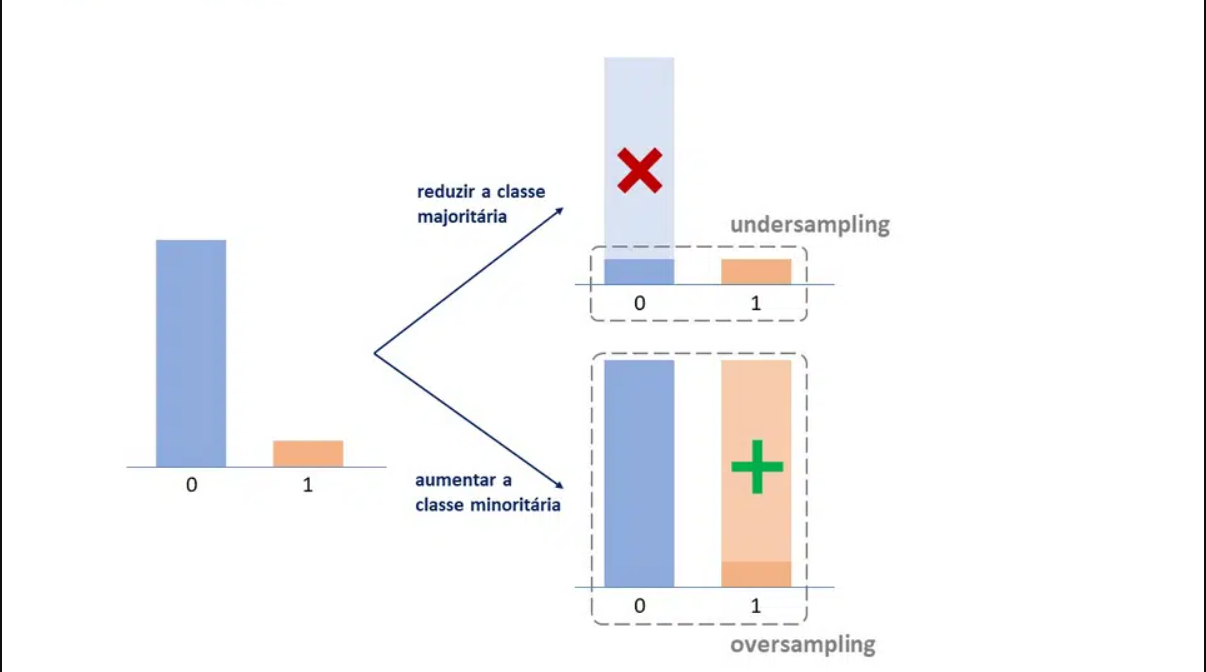

### Reduzindo os registros da classe majoritária
- Vamos retirar dados da classe que possui mais registros
    - Precisamos ter cuidado para que essa retirada não acabe causando perda de  informação (retirando informações que são muito importantes)
    - Também é necessário verificar o tamanho da base restante
- Podemos começar fazendo isso excluindo registros de forma aleatória com o https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler

In [69]:
from imblearn.under_sampling import RandomUnderSampler

In [70]:
rus = RandomUnderSampler(random_state=42)

In [71]:
X_res, y_res = rus.fit_resample(X_train, y_train)

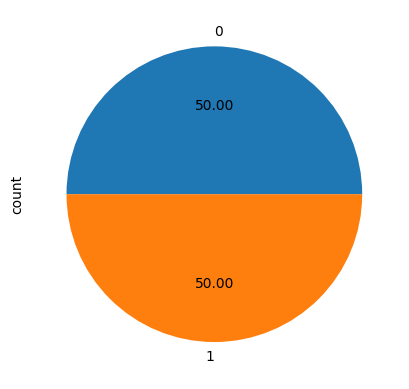

In [72]:
y_res.value_counts().plot.pie(autopct='%.2f');

In [73]:
y_res.value_counts()

Class
0    330
1    330
Name: count, dtype: int64

### Aumentando os registros da classe minoritária
- Duplicando os valores de maneira aleatória com o https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
    - Precisamos garantir que não vamos ter overfitting por mostrar ao modelo várias vezes os mesmos dados

In [74]:
from imblearn.over_sampling import RandomOverSampler

In [75]:
ros = RandomOverSampler(random_state=42)

In [76]:
X_resROS, y_resROS = ros.fit_resample(X_train, y_train)

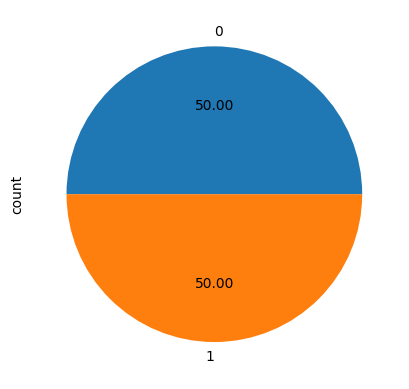

In [77]:
y_resROS.value_counts().plot.pie(autopct='%.2f');

In [78]:
y_resROS.value_counts()

Class
0    190490
1    190490
Name: count, dtype: int64

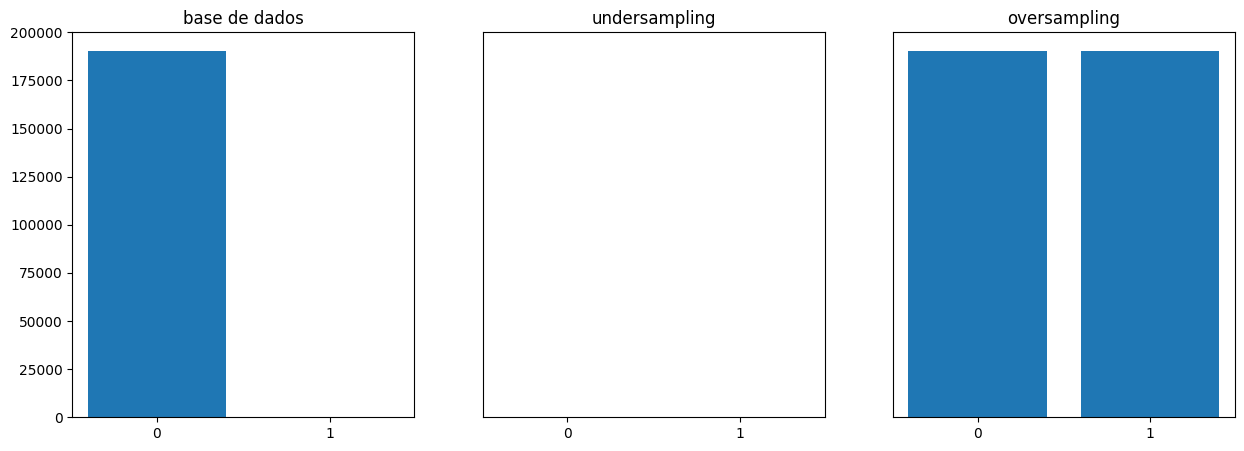

In [50]:
fig,ax=plt.subplots(ncols=3,figsize=(15,5))

ax[0].bar(y_train.value_counts().index,y_train.value_counts().values)
ax[1].bar(y_res.value_counts().index,y_res.value_counts().values)
ax[2].bar(y_resROS.value_counts().index,y_resROS.value_counts().values)

ax[0].set(ylim=(0,200000),xticks=[0,1])
ax[0].set_title('base de dados')
ax[1].set(ylim=(0,200000),xticks=[0,1], yticks=[])
ax[1].set_title('undersampling')
ax[2].set(ylim=(0,200000),xticks=[0,1], yticks=[])
ax[2].set_title('oversampling')

plt.show()

In [79]:

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def table_score(X_train, X_test, Y_train, y_test):

  # Logistic Regression
  logreg = LogisticRegression(random_state= 42)
  logreg.fit(X_train, Y_train)
  Y_pred_logreg = logreg.predict(X_test)
  acc_log = round(logreg.score(X_test, y_test) * 100, 2)
  ps_log = precision_score(y_test, Y_pred_logreg)
  rs_log = round(recall_score(y_test, Y_pred_logreg) * 100, 2)

  # KNN
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(X_train, Y_train)
  Y_pred_knn = knn.predict(X_test)
  acc_knn = round(knn.score(X_test, y_test) * 100, 2)
  ps_knn = precision_score(y_test, Y_pred_knn)
  rs_knn = round(recall_score(y_test, Y_pred_knn) * 100, 2)

  # Decision Tree
  decision_tree = DecisionTreeClassifier(random_state= 42)
  decision_tree.fit(X_train, Y_train)
  Y_pred_dt = decision_tree.predict(X_test)
  acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
  ps_decision_tree = precision_score(y_test, Y_pred_dt)
  rs_decision_tree = round(recall_score(y_test, Y_pred_dt) * 100, 2)

  # Random Forest
  random_forest = RandomForestClassifier(random_state= 42, n_estimators=100)
  random_forest.fit(X_train, Y_train)
  Y_pred_rf = random_forest.predict(X_test)
  acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
  ps_random_forest = precision_score(y_test, Y_pred_rf) 
  rs_random_forest = round(recall_score(y_test, Y_pred_rf) * 100, 2)

  models = pd.DataFrame({
      'Model': ['KNN', 'Logistic Regression',
                'Random Forest', 'Decision Tree'],
      'Score': [acc_knn, acc_log, acc_random_forest, 
                acc_decision_tree],
      'Precision': [ps_log, ps_knn, 
                    ps_decision_tree, ps_random_forest],
      'Recall': [rs_log, rs_knn, 
                 rs_decision_tree, rs_random_forest]        
        })
  models = models.sort_values(by='Recall', ascending=False)

  return models

In [80]:
table_score(X_res, X_test, y_res, y_test)

,Model,Score,Precision,Recall
2,Random Forest,97.26,0.015493,90.74
3,Decision Tree,90.05,0.053333,88.89
0,KNN,64.31,0.031046,88.27
1,Logistic Regression,95.23,0.003214,66.67


## 2º Avaliação

- Com o balanceamento do dataset conseguir uma melhora de aproximadamente 15% no Recall com o método Random Forest, transformado a precisão verdadeira da nossa precisão em 90,74%

- A seguir tentaremos balancear o dataset de forma mais eficientes a fim de melhorar a nossa previsão com o Recall

### ClusterCentroids 

O metodo ClusterCentroids é utilizada para realizar o subamostragem (undersampling) por meio do método de centroides de clusters. 

O ClusterCentroids organizam os dados semelhantes/centrados em 'centros' diferentes e selecionam o centro de cada um desses semelhantes a fim de equilibrar os dados distintos e reduzir a redundancia na subamostragem determinada. Isso ajuda a equilibrar as classes, tornando o conjunto de dados mais propício para treinar modelos que não sejam tendenciosos em direção à classe majoritária.

Em resumo, o ClusterCentroids analisa todos os dados do conjunto e seleciona os dados que melhor representam o conjunto como um todo.

In [81]:
from imblearn.under_sampling import ClusterCentroids

In [87]:
# Aplicando o ClusterCentroids
# Utilizaremos os
cc = ClusterCentroids(sampling_strategy='auto', random_state=42)
X_resampled_cc, y_resampled_cc = cc.fit_resample(X_train, y_train)

c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [88]:
table_score(X_resampled_cc, X_test, y_resampled_cc, y_test)

,Model,Score,Precision,Recall
3,Decision Tree,24.84,0.001843,100.00
2,Random Forest,6.63,0.002246,98.15
0,KNN,63.56,0.015027,88.89
1,Logistic Regression,89.94,0.003322,70.37


### NearMiss
Utiliza um metodo diferente de seleção, realizando under_sampling. Usa o KNN (KNearestNeighbors) para a seleção

A ideia principal do NearMiss é garantir que os dados da classe majoritária escolhidas estejam próximas ou "perto" dos dados da classe minoritária em termos de distância, com o intuito de capturar melhor a complexidade da classe minoritária.